<h1>Brain Tumor Detection using Machine Learning and Deep Learning</h1>
<i>Project by Pratyush Kargeti</i>

<i>Dataset is taken from kaggle (https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection)

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [5]:
# Define paths
data_dir = 'C:\\Users\\R C KARGETI\\Desktop\\prat_ML'
categories = ['no_tumor', 'yes_tumor']

In [6]:
# Initialize lists to store images and labels
images = []
labels = []

In [7]:
# Load and preprocess images
for category in categories:
    category_path = os.path.join(data_dir, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path).convert("RGB").resize((224, 224))
        img_array = np.array(img)
        images.append(img_array)
        labels.append(categories.index(category))  # 0 for no_tumor, 1 for yes_tumor

In [8]:
len(images)

245

In [9]:
len(labels)

245

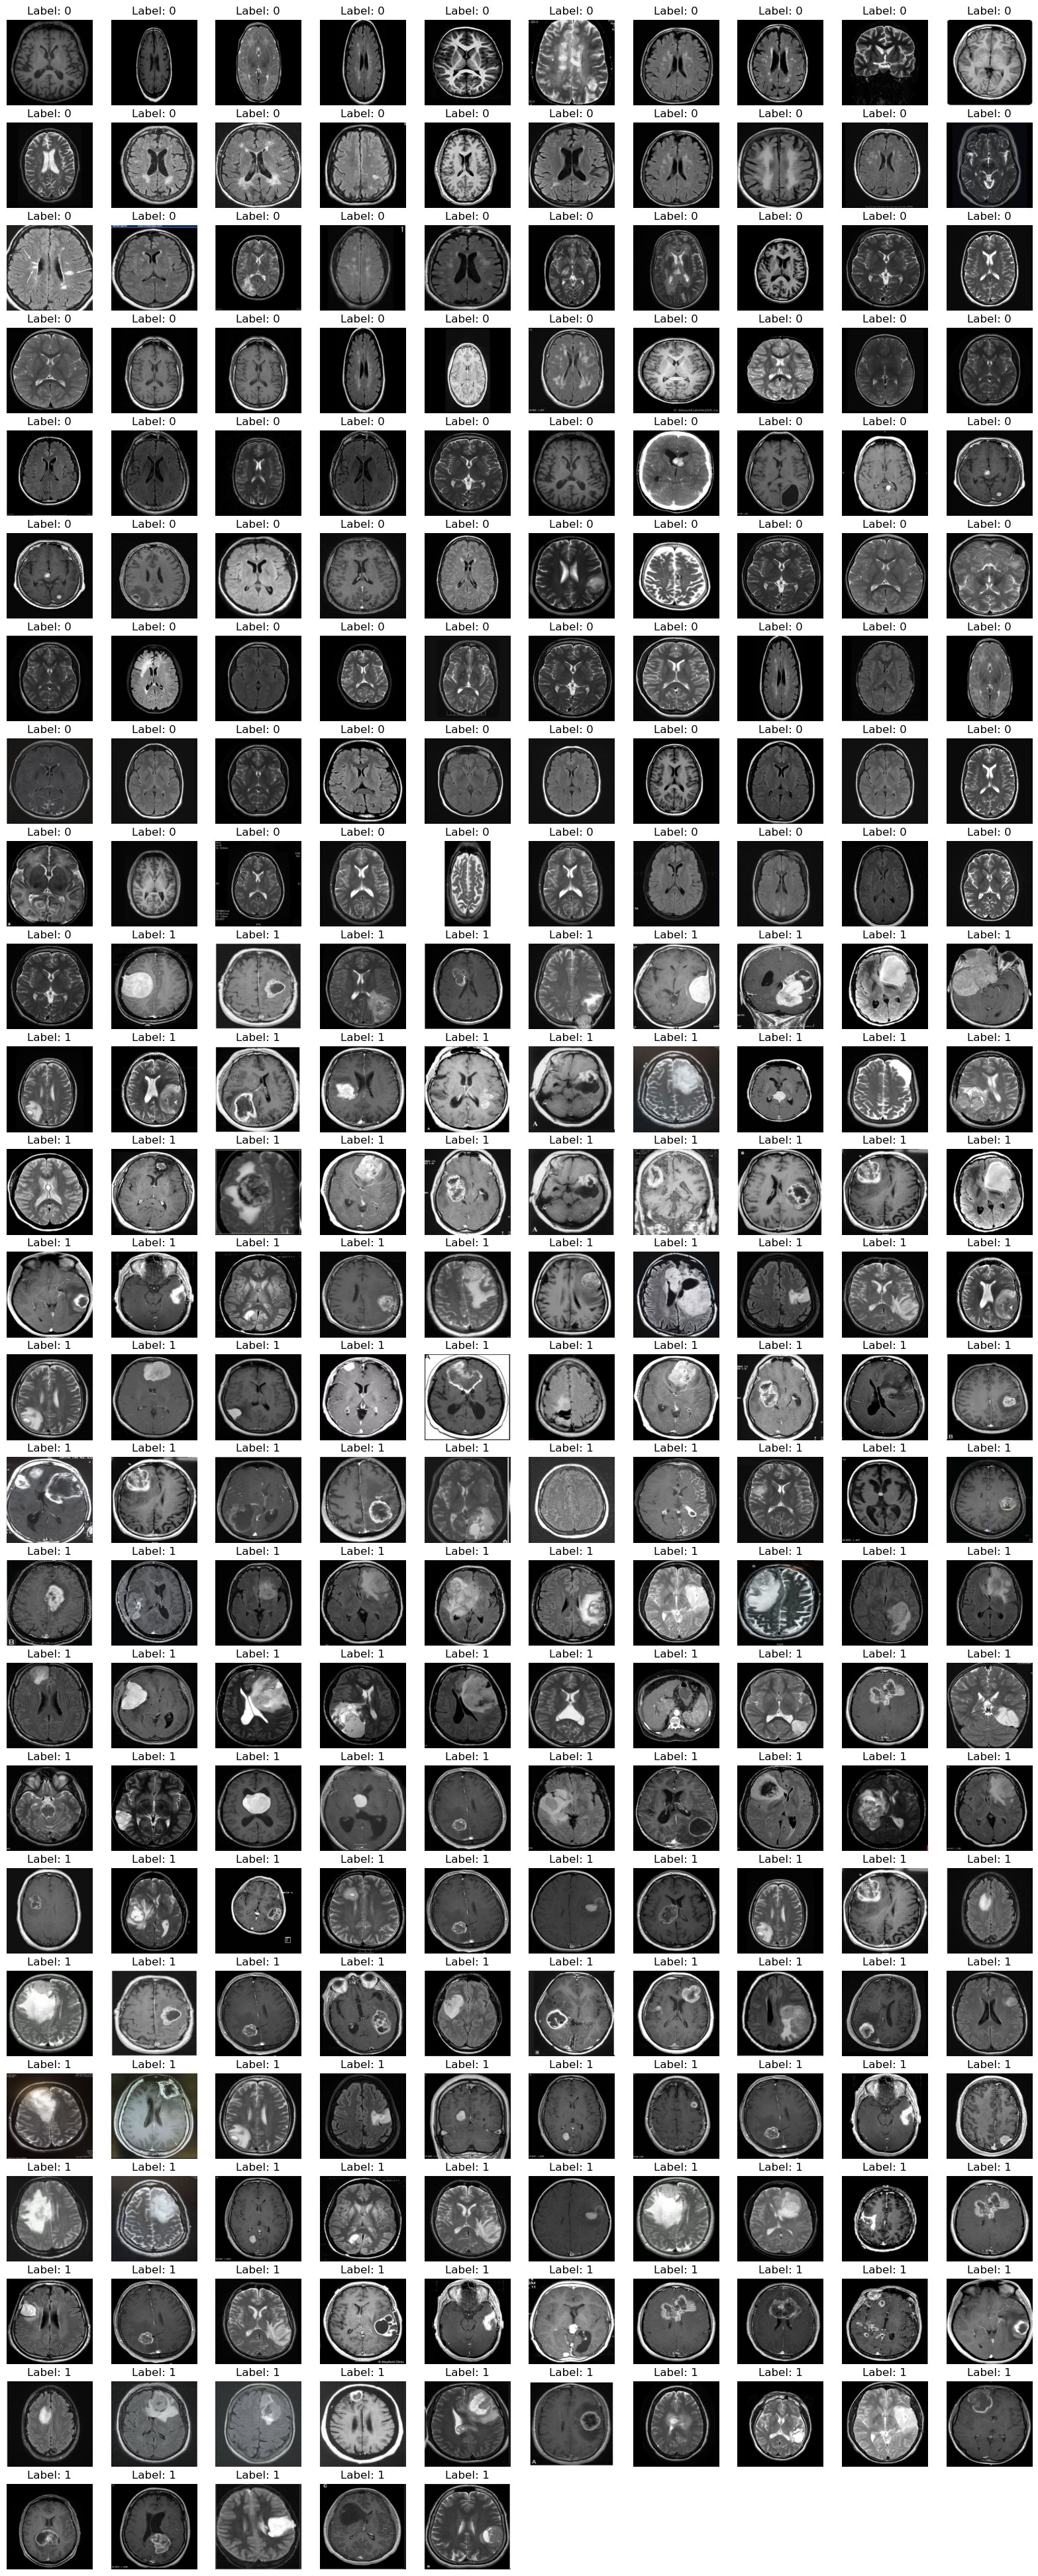

In [14]:
# Display first 245 images after loading
plt.figure(figsize=(20, 50))  # Adjust figure size to fit more images
for i in range(245):
    plt.subplot(25, 10, i + 1)  # Adjust the grid to 25 rows and 10 columns
    plt.imshow(images[i])
    plt.title('Label: {}'.format(labels[i]))
    plt.axis('off')
plt.show()

In [15]:
# Convert lists to numpy arrays
images = np.array(images) / 255.0
labels = np.array(labels)

In [16]:
# Split Data into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])
print(X_train.shape[3])

196
224
224
3


In [20]:
y_train.shape

(196,)

In [21]:
y_val.shape

(49,)

In [18]:
print(len(X_train))
print(len(X_val))

196
49


In [23]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
# Define the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [25]:
# Initialize a list to store the results
results = []

In [26]:
# Function to calculate and append results
def append_results(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    results.append((model_name, accuracy, precision, f1, recall))

In [27]:
svm_model = SVC()
svm_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

SVC()

In [29]:
y_val[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [30]:
svm_model.predict(X_val[:10].reshape(X_val[:10].shape[0], -1))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
svm_pred_val = svm_model.predict(X_val.reshape(X_val.shape[0], -1))

In [32]:
append_results('SVM', y_val, svm_pred_val)

In [33]:
results

[('SVM',
  0.7959183673469388,
  0.8197441656088273,
  0.7807122849139656,
  0.7959183673469388)]

In [35]:
import pandas as pd
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df      

Accuracy  Avg Precision  Avg F1-Score  Avg Recall
Model                                                   
SVM    0.795918       0.819744      0.780712    0.795918

In [36]:
cm = confusion_matrix(y_val, svm_pred_val)
cm

array([[10,  9],
       [ 1, 29]], dtype=int64)

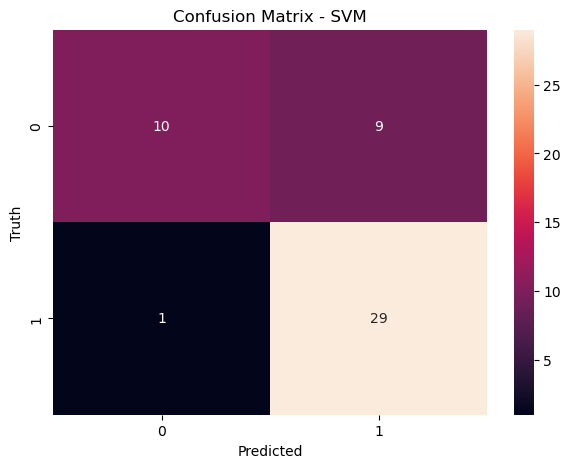

In [37]:
# Display confusion matrix for SVM
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - SVM')
plt.show()

In [38]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

RandomForestClassifier()

In [39]:
rf_pred_val = rf_model.predict(X_val.reshape(X_val.shape[0], -1))

In [40]:
append_results('Random Forest', y_val, rf_pred_val)

In [41]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df  

Accuracy  Avg Precision  Avg F1-Score  Avg Recall
Model                                                           
SVM            0.795918       0.819744      0.780712    0.795918
Random Forest  0.877551       0.884114      0.874175    0.877551

In [42]:
cm = confusion_matrix(y_val, rf_pred_val)
cm

array([[14,  5],
       [ 1, 29]], dtype=int64)

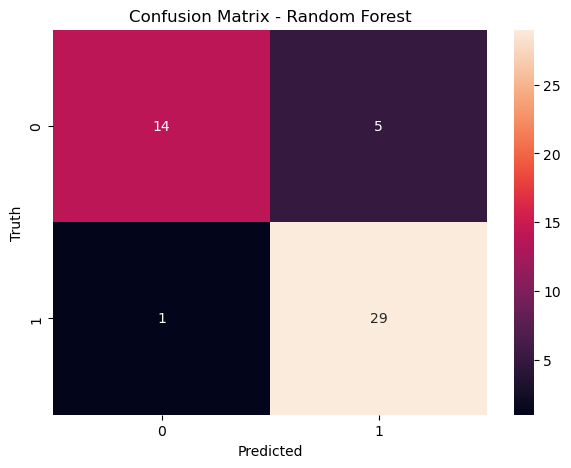

In [43]:
# Display confusion matrix for Random Forest
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [44]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

KNeighborsClassifier()

In [45]:
knn_pred_val = knn_model.predict(X_val.reshape(X_val.shape[0], -1))

In [46]:
append_results('KNN', y_val, knn_pred_val)

In [47]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df  

Accuracy  Avg Precision  Avg F1-Score  Avg Recall
Model                                                           
SVM            0.795918       0.819744      0.780712    0.795918
Random Forest  0.877551       0.884114      0.874175    0.877551
KNN            0.755102       0.755102      0.755102    0.755102

In [48]:
cm = confusion_matrix(y_val, knn_pred_val)
cm

array([[13,  6],
       [ 6, 24]], dtype=int64)

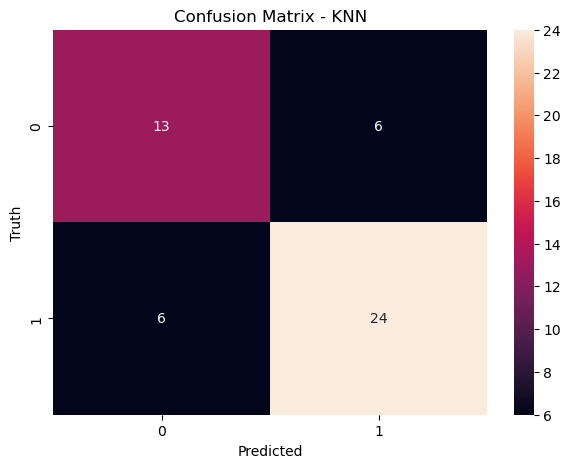

In [49]:
# Display confusion matrix for KNN
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - KNN')
plt.show()

In [50]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

DecisionTreeClassifier()

In [51]:
dt_pred_val = dt_model.predict(X_val.reshape(X_val.shape[0], -1))

In [52]:
append_results('Decision Tree',y_val, dt_pred_val)

In [53]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df  

Accuracy  Avg Precision  Avg F1-Score  Avg Recall
Model                                                           
SVM            0.795918       0.819744      0.780712    0.795918
Random Forest  0.877551       0.884114      0.874175    0.877551
KNN            0.755102       0.755102      0.755102    0.755102
Decision Tree  0.693878       0.687616      0.688047    0.693878

In [55]:
cm = confusion_matrix(y_val, dt_pred_val)
cm

array([[10,  9],
       [ 6, 24]], dtype=int64)

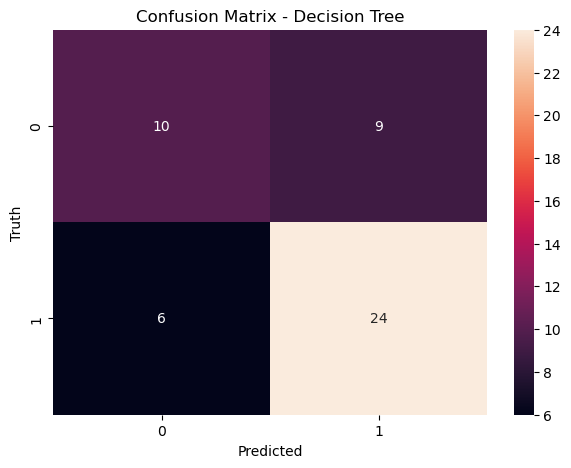

In [56]:
# Display confusion matrix for Decision Tree
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [57]:
# Train and evaluate Gaussian Naive Bayes
gnb_model = GaussianNB()

In [58]:
gnb_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

GaussianNB()

In [59]:
gnb_pred_val = gnb_model.predict(X_val.reshape(X_val.shape[0], -1))

In [60]:
append_results('Gaussian Naive Bayes', y_val, gnb_pred_val)

In [61]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df  

Accuracy  Avg Precision  Avg F1-Score  Avg Recall
Model                                                                  
SVM                   0.795918       0.819744      0.780712    0.795918
Random Forest         0.877551       0.884114      0.874175    0.877551
KNN                   0.755102       0.755102      0.755102    0.755102
Decision Tree         0.693878       0.687616      0.688047    0.693878
Gaussian Naive Bayes  0.734694       0.745619      0.737418    0.734694

In [62]:
cm = confusion_matrix(y_val, gnb_pred_val)
cm

array([[14,  5],
       [ 8, 22]], dtype=int64)

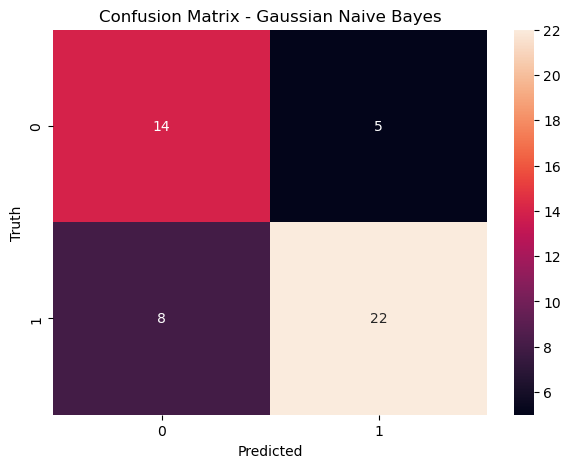

In [63]:
# Display confusion matrix for Gaussian Naive Bayes
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

In [64]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

MultinomialNB()

In [65]:
mnb_pred_val = mnb_model.predict(X_val.reshape(X_val.shape[0], -1))

In [66]:
append_results('Multinomial Naive Bayes', y_val, mnb_pred_val)

In [67]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df  

Accuracy  Avg Precision  Avg F1-Score  Avg Recall
Model                                                                     
SVM                      0.795918       0.819744      0.780712    0.795918
Random Forest            0.877551       0.884114      0.874175    0.877551
KNN                      0.755102       0.755102      0.755102    0.755102
Decision Tree            0.693878       0.687616      0.688047    0.693878
Gaussian Naive Bayes     0.734694       0.745619      0.737418    0.734694
Multinomial Naive Bayes  0.693878       0.715986      0.697761    0.693878

In [68]:
cm = confusion_matrix(y_val, mnb_pred_val)
cm

array([[14,  5],
       [10, 20]], dtype=int64)

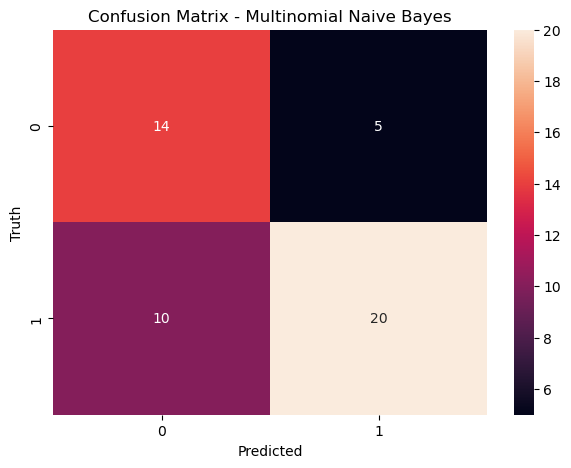

In [69]:
# Display confusion matrix for Multinomial Naive Bayes
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

In [72]:
lr_model = LogisticRegression(max_iter=10000)

In [73]:
lr_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

LogisticRegression(max_iter=10000)

In [74]:
lr_pred_val = mlr_model.predict(X_val.reshape(X_val.shape[0], -1))

In [75]:
append_results('Logistic Regression', y_val, lr_pred_val)

In [76]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df  

Accuracy  Avg Precision  Avg F1-Score  Avg Recall
Model                                                                     
SVM                      0.795918       0.819744      0.780712    0.795918
Random Forest            0.877551       0.884114      0.874175    0.877551
KNN                      0.755102       0.755102      0.755102    0.755102
Decision Tree            0.693878       0.687616      0.688047    0.693878
Gaussian Naive Bayes     0.734694       0.745619      0.737418    0.734694
Multinomial Naive Bayes  0.693878       0.715986      0.697761    0.693878
Logistic Regression      0.775510       0.776968      0.767138    0.775510

In [78]:
cm = confusion_matrix(y_val, lr_pred_val)
cm

array([[11,  8],
       [ 3, 27]], dtype=int64)

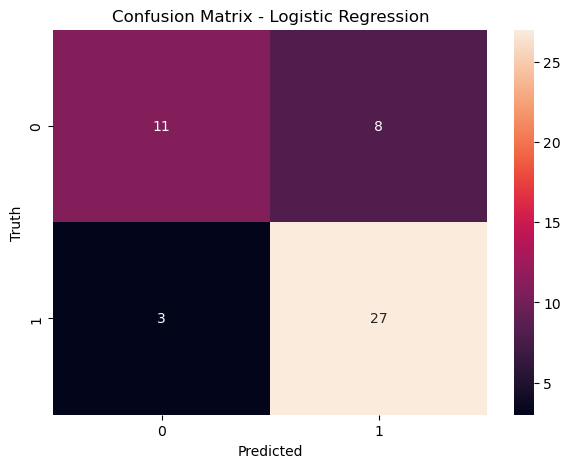

In [79]:
# Display confusion matrix for Multinomial Logistic Regression
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [86]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Bidirectional, Input, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [81]:
X_train[0].shape

(224, 224, 3)

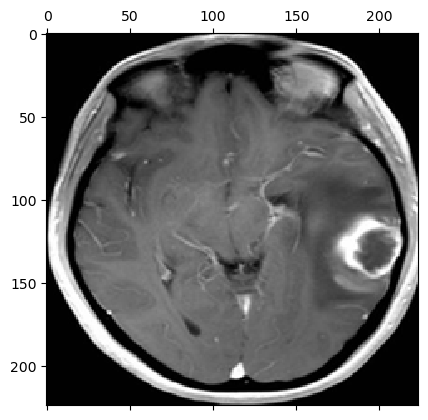

In [82]:
plt.matshow(X_train[0])

In [83]:
y_train

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1])

In [112]:
X_val

array([[[[0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         ...,
         [0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471]],

        [[0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         ...,
         [0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471]],

        [[0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         ...,
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627]],

        ...,

        [[0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471]

In [111]:
y_val

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1])

<h3 st<h3 style='color:Red'>Using ANN for classification</h3>

In [118]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [119]:
# Define the model
ann_model = keras.Sequential([
    Input(shape=(224,224,3)),
    keras.layers.Flatten(),
    Dense(100, activation='relu'), 
    Dense(1, activation='sigmoid')
])
ann_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

ann_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 254ms/step - accuracy: 0.5116 - loss: 23.7737
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - accuracy: 0.5778 - loss: 3.4091
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - accuracy: 0.5446 - loss: 2.3869
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.6594 - loss: 2.0015
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 290ms/step - accuracy: 0.6937 - loss: 0.9489
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 282ms/step - accuracy: 0.8347 - loss: 0.6418
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step - accuracy: 0.8573 - loss: 0.4215
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - accuracy: 0.8769 - loss: 0.3880
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.8817 - loss: 0.2720
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step - accuracy: 0.8941 - loss: 0.2440


In [120]:
# Make predictions on the validation data
y_pred = ann_model.predict(X_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [121]:
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes

In [123]:
ann_model.evaluate(X_val,y_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7054 - loss: 1.2394 


[1.1075693368911743, 0.7142857313156128]

In [124]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_classes, zero_division=0.0))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.26      0.42        19
           1       0.68      1.00      0.81        30

    accuracy                           0.71        49
   macro avg       0.84      0.63      0.61        49
weighted avg       0.81      0.71      0.66        49



In [125]:
cm = confusion_matrix(y_val, y_pred_classes)
cm

array([[ 5, 14],
       [ 0, 30]], dtype=int64)

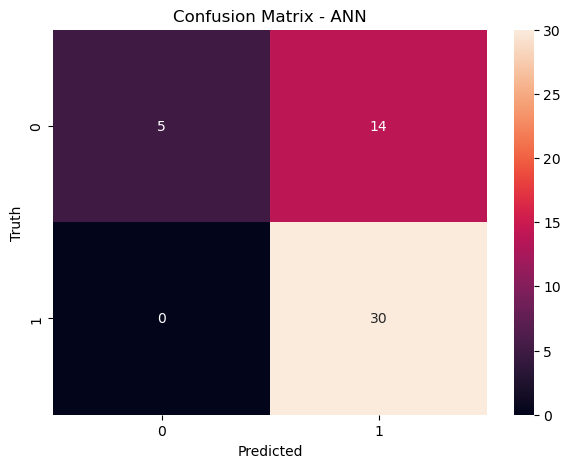

In [126]:
# Display confusion matrix for ANN
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - ANN')
plt.show()

<h3 style='color:brown'>Using CNN for classification</h3>

In [135]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [136]:
cnn_model = keras.Sequential([
    Input(shape=(224,224,3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(X_train, y_train, epochs=10)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4883 - loss: 3.7259
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7891 - loss: 0.5615
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8467 - loss: 0.5085
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8368 - loss: 0.4173
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8670 - loss: 0.3591
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9234 - loss: 0.2533
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9457 - loss: 0.1712
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9769 - loss: 0.0817
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 1.0000 - loss: 0.0538
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9783 - loss: 0.0452


In [137]:
# Make predictions on the validation data
y_pred = cnn_model.predict(X_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step


In [138]:
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes

In [139]:
cnn_model.evaluate(X_val,y_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.8318 - loss: 0.6250


[0.5384871959686279, 0.8571428656578064]

In [140]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_classes, zero_division=0.0))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.85      0.93      0.89        30

    accuracy                           0.86        49
   macro avg       0.86      0.84      0.84        49
weighted avg       0.86      0.86      0.85        49



In [141]:
cm = confusion_matrix(y_val, y_pred_classes)
cm

array([[14,  5],
       [ 2, 28]], dtype=int64)

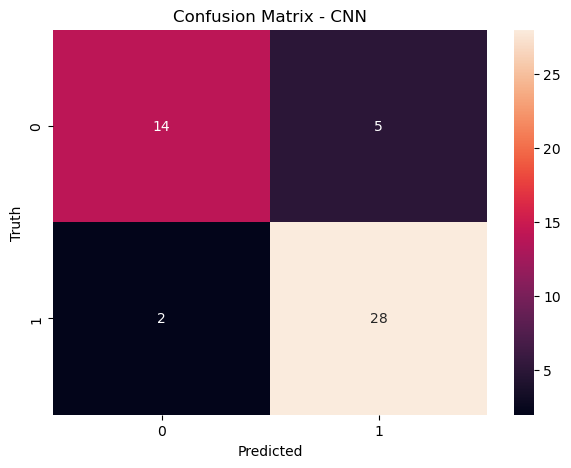

In [142]:
# Display confusion matrix for CNN
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - CNN')
plt.show()